In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import pathlib
import csv
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.svm import LinearSVC


#PCA,Kernal PCA, Forward selection, backward selection, random selection ile feature secip ML algoritmalarının performanslarını
#ölç

In [34]:
df = pd.read_csv(r'C:\Users\User\Desktop\features.csv')  

In [35]:
df.head()

,ZCRMean,ZCRStd,ZCRSkw,ZCRKrt,ZCRMed,ZCRMin,ZCRMax,RMSMean,RMSStd,RMSSkw,...,Chroma3Max,Chroma4Max,Chroma5Max,Chroma6Max,Chroma7Max,Chroma8Max,Chroma9Max,Chroma10Max,Chroma11Max,Labels
0,0.083066,0.027690,1.428553,3.904819,0.078125,0.033203,0.242676,0.130225,0.053187,0.503164,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,blues
1,0.056044,0.038059,2.362931,9.193445,0.047852,0.006348,0.323730,0.095918,0.048718,0.299131,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,blues
2,0.076301,0.031738,4.185323,37.723069,0.073730,0.012695,0.440918,0.175573,0.052423,0.220822,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,blues
3,0.033309,0.020569,1.072661,2.017897,0.030762,0.006348,0.145020,0.141191,0.079617,0.525917,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,blues
4,0.101500,0.044199,1.939640,5.710074,0.092773,0.039551,0.366211,0.091563,0.047996,0.849254,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,blues


In [36]:
le = preprocessing.LabelEncoder()
le.fit(df['Labels'])

LabelEncoder()

In [37]:
labelEncoded = le.transform(df['Labels'])

In [38]:
df['LabelEncoded'] = labelEncoded
df.head()

,ZCRMean,ZCRStd,ZCRSkw,ZCRKrt,ZCRMed,ZCRMin,ZCRMax,RMSMean,RMSStd,RMSSkw,...,Chroma4Max,Chroma5Max,Chroma6Max,Chroma7Max,Chroma8Max,Chroma9Max,Chroma10Max,Chroma11Max,Labels,LabelEncoded
0,0.083066,0.027690,1.428553,3.904819,0.078125,0.033203,0.242676,0.130225,0.053187,0.503164,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,blues,0
1,0.056044,0.038059,2.362931,9.193445,0.047852,0.006348,0.323730,0.095918,0.048718,0.299131,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,blues,0
2,0.076301,0.031738,4.185323,37.723069,0.073730,0.012695,0.440918,0.175573,0.052423,0.220822,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,blues,0
3,0.033309,0.020569,1.072661,2.017897,0.030762,0.006348,0.145020,0.141191,0.079617,0.525917,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,blues,0
4,0.101500,0.044199,1.939640,5.710074,0.092773,0.039551,0.366211,0.091563,0.047996,0.849254,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,blues,0


In [39]:
scaler = StandardScaler()
y = df['LabelEncoded']
X = df.drop(['LabelEncoded','Labels'], axis=1)

In [40]:
X_scaled = pd.DataFrame(scaler.fit_transform(X),columns = X.columns)
X_scaled.head()

,ZCRMean,ZCRStd,ZCRSkw,ZCRKrt,ZCRMed,ZCRMin,ZCRMax,RMSMean,RMSStd,RMSSkw,...,Chroma2Max,Chroma3Max,Chroma4Max,Chroma5Max,Chroma6Max,Chroma7Max,Chroma8Max,Chroma9Max,Chroma10Max,Chroma11Max
0,-0.493284,-0.926543,0.024843,-0.116640,-0.404680,0.816065,-0.746026,-0.008975,0.182033,0.145133,...,0.060608,0.113365,0.057595,0.078116,0.113324,0.049328,0.100057,0.044257,0.106991,0.087624
1,-1.139804,-0.483698,0.953716,0.692449,-1.122855,-0.846166,-0.255064,-0.531164,0.014877,-0.183030,...,0.060608,0.113365,0.057595,0.078116,0.113324,0.049328,0.100057,0.044257,0.106991,0.087624
2,-0.655156,-0.753669,2.765370,5.057102,-0.508931,-0.453275,0.454761,0.681293,0.153457,-0.308979,...,0.060608,0.113365,0.057595,0.078116,0.113324,0.049328,0.100057,0.044257,0.106991,0.087624
3,-1.683760,-1.230671,-0.328953,-0.405314,-1.528276,-0.846166,-1.337546,0.157952,1.170544,0.181728,...,0.060608,0.113365,0.057595,0.078116,0.113324,0.049328,0.100057,0.044257,0.106991,0.087624
4,-0.052246,-0.221504,0.532919,0.159540,-0.057176,1.208956,0.002248,-0.597457,-0.012123,0.701777,...,0.060608,0.113365,0.057595,0.078116,0.113324,0.049328,0.100057,0.044257,0.106991,0.087624


In [41]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1, random_state=42)

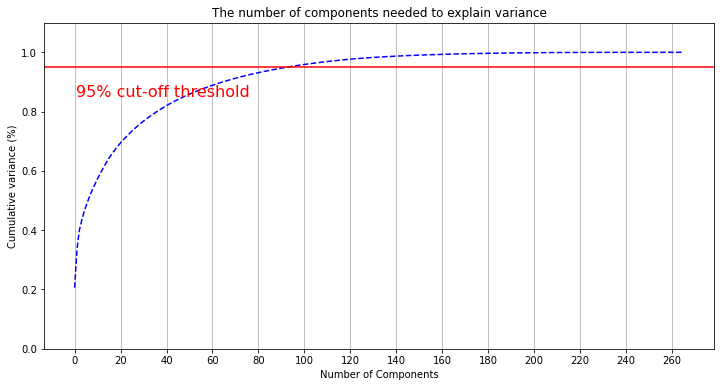

In [43]:
def plotVariance():
    pca = PCA().fit(X_train)
    plt.rcParams["figure.figsize"] = (12,6)

    fig, ax = plt.subplots()
    xi = np.arange(0, 266, step=1)
    y = np.cumsum(pca.explained_variance_ratio_)

    plt.ylim(0.0,1.1)
    plt.plot(xi, y, linestyle='--', color='b')

    plt.xlabel('Number of Components')
    plt.xticks(np.arange(0, 266, step=20)) #change from 0-based array index to 1-based human-readable label
    plt.ylabel('Cumulative variance (%)')
    plt.title('The number of components needed to explain variance')

    plt.axhline(y=0.95, color='r', linestyle='-')
    plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

    ax.grid(axis='x')
    plt.show()
plotVariance()

In [44]:
pca = PCA(n_components=100, random_state=0)
lda = LinearDiscriminantAnalysis(n_components=9)
kpca = KernelPCA(n_components=100, kernel='linear')

In [45]:
X_train_pca = pca.fit(X_train).transform(X_train) #(900,100) PCA train data
X_test_pca = pca.fit(X_train).transform(X_test)  #(100,100) PCA test data
X_train_lda = lda.fit(X_train,y_train).transform(X_train) #(900,9) LDA train data
X_test_lda = lda.fit(X_test,y_test).transform(X_test)  #(100,9) LDA test data
X_train_kpca = kpca.fit(X_train).transform(X_train)  #(900,100) KPCA train data
X_test_kpca = kpca.fit(X_test).transform(X_test)    #(100,100) KPCA test data

In [59]:
def showMLPerformances(X, y):
    models = [MLPClassifier(),
           LogisticRegression(),
           RandomForestClassifier(),
           LinearDiscriminantAnalysis(),
           KNeighborsClassifier(),
           SVC(),
           GaussianNB(),
           GradientBoostingClassifier(),
           AdaBoostClassifier(),
           LinearSVC(),
           SVC()]
    
    
    classifierNames = ['MLP', 'LogisticRegression','RandomForest','LDA','KNN','SVC','GaussianNB','GradBoost'
                       ,'AdaBoost','LinearSVC']
    
    
    param_grid = {'MLP' : [{'max_iter': [500,1000,2000], 'activation': ['tanh','logistic','identity']}],
                  'LogisticRegression' : [{'solver': ['newton-cg', 'lbfgs','saga'], 'max_iter': [200,500,1000]}],
                  'RandomForest' : [{'n_estimators': [50,100,150], 'criterion': ['gini', 'entropy']}],
                  'LDA' : [{'solver': ['eigen', 'svd', 'lsqr']}],
                  'KNN' : [{'n_neighbors': [5,10,20], 'weights': ['uniform', 'distance']}],
                  'SVC' : [{'kernel': ['poly', 'rbf', 'sigmoid'], 'degree': [2,3], 'C': [1, 50, 100]}],
                  'GaussianNB' : [{}],
                  'GradBoost' : [{}],
                  'AdaBoost' : [{}],
                  'LinearSVC' : [{'max_iter': [500000,1000000], 'multi_class': ['ovr', 'crammer_singer']}]}
    
    
    for cname, clf in zip(classifierNames, models):
        print('SCORES FOR '+cname)
        GridSearch = GridSearchCV(estimator=clf, param_grid=param_grid[cname], scoring='accuracy', n_jobs=-1)
        GridSearch.fit(X, y)
        print('Best parameters:')
        print(GridSearch.best_params_)
        print('gaves score: %.4f' %(GridSearch.best_score_))
        print('++++++++++++++++++++++++++++')

In [58]:
showMLPerformances(X_train, y_train)   #Train dataseti ile (900,266)

SCORES FOR MLP
Best parameters:
{'activation': 'logistic', 'max_iter': 1000}
gaves score: 0.7756
++++++++++++++++++++++++++++
SCORES FOR LogisticRegression


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


Best parameters:
{'max_iter': 200, 'solver': 'saga'}
gaves score: 0.7633
++++++++++++++++++++++++++++
SCORES FOR RandomForest
Best parameters:
{'criterion': 'entropy', 'n_estimators': 150}
gaves score: 0.7456
++++++++++++++++++++++++++++
SCORES FOR LDA
Best parameters:
{'solver': 'eigen'}
gaves score: 0.7289
++++++++++++++++++++++++++++
SCORES FOR KNN
Best parameters:
{'n_neighbors': 5, 'weights': 'uniform'}
gaves score: 0.6978
++++++++++++++++++++++++++++
SCORES FOR SVC
Best parameters:
{'C': 50, 'degree': 2, 'kernel': 'rbf'}
gaves score: 0.7867
++++++++++++++++++++++++++++
SCORES FOR GaussianNB
Best parameters:
{}
gaves score: 0.5700
++++++++++++++++++++++++++++
SCORES FOR GradBoost
Best parameters:
{}
gaves score: 0.7311
++++++++++++++++++++++++++++
SCORES FOR AdaBoost
Best parameters:
{}
gaves score: 0.1933
++++++++++++++++++++++++++++
SCORES FOR LinearSVC
Best parameters:
{'max_iter': 500000, 'multi_class': 'crammer_singer'}
gaves score: 0.7178
++++++++++++++++++++++++++++


In [60]:
showMLPerformances(X_train_pca, y_train) #PCA uygulandıktan sonraki (900,100) data ile 

SCORES FOR MLP
Best parameters:
{'activation': 'tanh', 'max_iter': 1000}
gaves score: 0.7644
++++++++++++++++++++++++++++
SCORES FOR LogisticRegression


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


Best parameters:
{'max_iter': 200, 'solver': 'saga'}
gaves score: 0.7467
++++++++++++++++++++++++++++
SCORES FOR RandomForest
Best parameters:
{'criterion': 'entropy', 'n_estimators': 150}
gaves score: 0.7044
++++++++++++++++++++++++++++
SCORES FOR LDA
Best parameters:
{'solver': 'eigen'}
gaves score: 0.7644
++++++++++++++++++++++++++++
SCORES FOR KNN
Best parameters:
{'n_neighbors': 5, 'weights': 'distance'}
gaves score: 0.7044
++++++++++++++++++++++++++++
SCORES FOR SVC
Best parameters:
{'C': 50, 'degree': 2, 'kernel': 'rbf'}
gaves score: 0.7811
++++++++++++++++++++++++++++
SCORES FOR GaussianNB
Best parameters:
{}
gaves score: 0.6100
++++++++++++++++++++++++++++
SCORES FOR GradBoost
Best parameters:
{}
gaves score: 0.6611
++++++++++++++++++++++++++++
SCORES FOR AdaBoost
Best parameters:
{}
gaves score: 0.1989
++++++++++++++++++++++++++++
SCORES FOR LinearSVC
Best parameters:
{'max_iter': 500000, 'multi_class': 'crammer_singer'}
gaves score: 0.6789
++++++++++++++++++++++++++++


In [61]:
showMLPerformances(X_train_lda, y_train)        #LDA'nın (900,9)luk datası

SCORES FOR MLP
Best parameters:
{'activation': 'identity', 'max_iter': 500}
gaves score: 0.9411
++++++++++++++++++++++++++++
SCORES FOR LogisticRegression
Best parameters:
{'max_iter': 200, 'solver': 'newton-cg'}
gaves score: 0.9433
++++++++++++++++++++++++++++
SCORES FOR RandomForest
Best parameters:
{'criterion': 'gini', 'n_estimators': 100}
gaves score: 0.9467
++++++++++++++++++++++++++++
SCORES FOR LDA
Best parameters:
{'solver': 'eigen'}
gaves score: 0.9500
++++++++++++++++++++++++++++
SCORES FOR KNN
Best parameters:
{'n_neighbors': 20, 'weights': 'uniform'}
gaves score: 0.9433
++++++++++++++++++++++++++++
SCORES FOR SVC
Best parameters:
{'C': 1, 'degree': 2, 'kernel': 'rbf'}
gaves score: 0.9467
++++++++++++++++++++++++++++
SCORES FOR GaussianNB
Best parameters:
{}
gaves score: 0.9467
++++++++++++++++++++++++++++
SCORES FOR GradBoost
Best parameters:
{}
gaves score: 0.9200
++++++++++++++++++++++++++++
SCORES FOR AdaBoost
Best parameters:
{}
gaves score: 0.4000
++++++++++++++++++++

## Supervised oldugu icin olabilir?

In [62]:
showMLPerformances(X_train_kpca, y_train)

SCORES FOR MLP
Best parameters:
{'activation': 'tanh', 'max_iter': 500}
gaves score: 0.7800
++++++++++++++++++++++++++++
SCORES FOR LogisticRegression


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


Best parameters:
{'max_iter': 200, 'solver': 'saga'}
gaves score: 0.7478
++++++++++++++++++++++++++++
SCORES FOR RandomForest
Best parameters:
{'criterion': 'gini', 'n_estimators': 150}
gaves score: 0.7078
++++++++++++++++++++++++++++
SCORES FOR LDA
Best parameters:
{'solver': 'eigen'}
gaves score: 0.7700
++++++++++++++++++++++++++++
SCORES FOR KNN
Best parameters:
{'n_neighbors': 5, 'weights': 'distance'}
gaves score: 0.6989
++++++++++++++++++++++++++++
SCORES FOR SVC
Best parameters:
{'C': 50, 'degree': 2, 'kernel': 'rbf'}
gaves score: 0.7778
++++++++++++++++++++++++++++
SCORES FOR GaussianNB
Best parameters:
{}
gaves score: 0.6144
++++++++++++++++++++++++++++
SCORES FOR GradBoost
Best parameters:
{}
gaves score: 0.6767
++++++++++++++++++++++++++++
SCORES FOR AdaBoost
Best parameters:
{}
gaves score: 0.2067
++++++++++++++++++++++++++++
SCORES FOR LinearSVC
Best parameters:
{'max_iter': 500000, 'multi_class': 'crammer_singer'}
gaves score: 0.6789
++++++++++++++++++++++++++++
